# Valencia Airbnb Analysis

## Import Dependencies

In [209]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from wordcloud import WordCloud
%matplotlib inline

In [210]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [211]:
df_calendar = pd.read_csv('calendar.csv.gz')
df_listing = pd.read_csv('listings.csv.gz')
df_review = pd.read_csv('reviews.csv.gz')
# neighbourhoods.geojson

## Visualize Data

In [257]:
import geopandas as gpd

In [212]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,48154,2024-06-22,f,$75.00,NaN,3.0,25.0
1,48154,2024-06-23,f,$75.00,NaN,3.0,25.0
2,48154,2024-06-24,f,$75.00,NaN,5.0,22.0
3,48154,2024-06-25,f,$75.00,NaN,5.0,22.0
4,48154,2024-06-26,f,$75.00,NaN,5.0,22.0


In [213]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,48154,https://www.airbnb.com/rooms/48154,20240622134440,2024-06-22,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,https://a0.muscache.com/pictures/1109085/9c0d4...,219476,https://www.airbnb.com/users/show/219476,Antonio,2010-09-01,Spain,Un saludo a todos. Espero que os pongáis en co...,within a few hours,100%,96%,f,https://a0.muscache.com/im/users/219476/profil...,https://a0.muscache.com/im/users/219476/profil...,La Saïdia,4,4,"['email', 'phone']",t,t,"Valencia, Spain",MORVEDRE,LA SAIDIA,39.48375,-0.37502,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Host greets you"", ""TV"", ""Microwave"", ""Free s...",$92.00,3,25,3,5,22,25,3.4,24.4,NaN,t,10,22,33,81,2024-06-22,161,31,3,2010-10-12,2024-06-12,4.60,4.69,4.62,4.84,4.78,4.49,4.52,VT-41540-V,f,4,4,0,0,0.97
1,136378,https://www.airbnb.com/rooms/136378,20240622134440,2024-06-23,city scrape,Old City Charm with Modern Comfort,NaN,NaN,https://a0.muscache.com/pictures/pro_photo_too...,591197,https://www.airbnb.com/users/show/591197,Elisa,2011-05-15,"Valencia, Spain",We are a group of three retired women from dif...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/591197/profil...,https://a0.muscache.com/im/users/591197/profil...,Camins al Grau,2,3,['phone'],t,t,NaN,EL MERCAT,CIUTAT VELLA,39.47358,-0.37815,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Long term stays allowed"", ""TV"", ""Ethernet co...",$75.00,28,28,28,28,28,28,28.0,28.0,NaN,t,0,0,0,0,2024-06-23,25,1,0,2011-11-02,2023-06-30,4.46,4.36,4.20,4.64,4.80,4.84,4.56,VT-42161-V,f,2,2,0,0,0.16
2,149715,https://www.airbnb.com/rooms/149715,20240622134440,2024-06-23,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 3 and a...,"Surrounded by historic houses, authentic res...",https://a0.muscache.com/pictures/7507244a-87d8...,5947,https://www.airbnb.com/users/show/5947,Susana Barbara,2009-01-03,"Valencia, Spain",I’ve been traveling since I was 15. I moved ...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Poblados Marítimos,1,1,['phone'],t,t,"Valencia, Valencian Community, Spain",CABANYAL-CANYAMELAR,POBLATS MARITIMS,39.46746,-0.32813,Entire home,Entire home/apt,10,4.0,4 baths,5.0,7.0,"[""Room-darkening shades"", ""Long term stays all...",$269.00,2,1125,2,3,1125,1125,2.1,1125.0,NaN,t,9,10,22,260,2024-06-23,259,38,3,2011-07-23,2024-06-17,4.66,4.71,4.55,4.84,4.89,4.59,4.62,Nº TURISMO VT36469V CATEGORIA: standard,f,1,1,0,0,1.65
3,165971,https://www.airbnb.com/rooms/165971,20240622134440,2024-0

In [214]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.596000e+03,9.596000e+03,9.596000e+03,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9078.000000,9421.000000,9081.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,0.0,9596.00000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,7801.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,9596.000000,9596.000000,9596.000000,9596.000000,7801.000000
mean,6.353315e+17,2.024062e+13,2.491254e+08,19.308879,25.341080,39.467505,-0.363516,3.483639,1.294503,1.630506,2.022244,6.180909,489.719154,5.472072,8.241976,582.177053,622.728637,7.111421,606.618977,NaN,11.09108,25.405898,42.770842,163.929762,42.678929,13.690288,1.352022,4.655370,4.714597,4.649738,4.789212,4.792640,4.682028,4.558380,13.553772,12.220092,1.308774,0.018028,1.831073
std,4.740290e+17,0.000000e+00,2.013337e+08,61.998842,115.228716,0.021983,0.023293,1.960911,0.571282,1.140957,1.893459,16.012169,412.272133,14.086968,18.176009,448.557180,443.236375,16.575156,438.345209,NaN,9.85060,19.827111,28.835804,112.947550,75.943947,18.208329,1.953948,0.417981,0.378872,0.437254,0.337401,0.366995,0.369550,0.453025,28.968555,29.210717,3.140352,0.266973,1.675302
min,4.815400e+04,2.024062e+13,5.947000e+03,1.000000,1.000000,39.279116,-0.426282,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.335199e+07,2.024062e+13,5.865364e+07,1.000000,2.000000,39.462440,-0.379762,2.000000,1.000000,1.000000,1.000000,1.000000,120.750000,1.000000,2.000000,260.000000,334.000000,2.000000,330.000000,NaN,2.00000,8.000000,18.000000,63.000000,2.000000,1.000000,0.000000,4.530000,4.637500,4.500000,4.740000,4.750000,4.560000,4.430000,1.000000,1.000000,0.000000,0.000000,0.530000
50%,8.425802e+17,2.024062e+13,1.895266e+08,3.000000,4.000000,39.469370,-0.370905,3.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.800000,365.000000,NaN,8.00000,21.000000,40.000000,152.000000,12.000000,6.000000,0.000000,4.760000,4.810000,4.760000,4.880000,4.900000,4.770000,4.670000,3.000000,1.000000,0.000000,0.000000,1.300000
75%,1.071721e+18,2.024062e+13,4.561352e+08,12.000000,16.000000,39.475485,-0.343460,4.000000,1.500000,2.000000,3.000000,4.000000,1125.000000,3.000000,6.000000,1125.000000,1125.000000,4.900000,1125.000000,NaN,19.00000,42.000000,68.000000,261.000000,47.000000,21.000000,2.000000,4.910000,4.940000,4.930000,4.980000,5.000000,4.930000,4.820000,9.000000,7.000000,1.000000,0.000000,2.700000
max,1.184465e+18,2.024062e+13,5.848199e+08,2616.000000,6382.000000,39.547770,-0.276100,16.000000,11.500000,17.000000,31.000000,365.000000,1125.000000,365.000000,365.000000,1125.000000,1125.000000,365.000000,1125.000000,NaN,30.00000,60.000000,90.000000,365.000000,860.000000,149.000000,15.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,151.000000,151.000000,21.000000,8.000000,12.210000


In [215]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,48154,117554,2010-10-12,180238,Martha,Toni's place was perfect in so many ways. It ...
1,48154,145645,2010-11-28,204240,Mark,Awesome stay!! We'd recommend Toni's apartment...
2,48154,190572,2011-03-01,258565,Domenico,really nice house in a wonderfull position! yo...
3,48154,195081,2011-03-08,213496,Romina & Martín,"Apartamento muy agradable, al igual que su pro..."
4,48154,218435,2011-04-05,340330,Jenna,"Was a great apartment, easy access to the site..."


In [216]:
print('df_listing contains information on %d listings provided by %d hosts.' % (len(df_listing['id'].unique()), len(df_listing['host_id'].unique())))

df_listing contains information on 9596 listings provided by 4599 hosts.


In [217]:
print('df_calendar looks into the future, the first date of observation is %s and the last date is %s.' % (df_calendar['date'].min(), df_calendar['date'].max()))

df_calendar looks into the future, the first date of observation is 2024-06-22 and the last date is 2025-06-22.


In [218]:
df_calendar['price'] = df_calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

/tmp/ipykernel_151199/498546103.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['price'] = df_calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [219]:
#Count the occurrences where price is less than or equal to 0
zero_or_negative_price_count = (df_calendar['price'] <= 0).sum()

# Print the result
print(f"The number of times 'price' is less than or equal to 0: {zero_or_negative_price_count}")

The number of times 'price' is less than or equal to 0: 0


## Data Preparation

In [220]:
df_listing = df_listing.drop_duplicates()
df_listing = df_listing.dropna(axis=1, how='all')
df_calendar.dropna(subset=['price'], axis = 0).shape[0]

df_listing['price'] = pd.to_numeric(df_listing['price'].replace('[\$,]', '', regex=True), errors='coerce')
df_listing.dropna(subset=['price'], inplace=True)

df_review['date'] = pd.to_datetime(df_review['date'])
df_review['month'] = df_review['date'].dt.month
df_review['year'] = df_review['date'].dt.year

df_calendar['price'] = pd.to_numeric(df_calendar['price'].replace('[\$,]', '', regex=True), errors='coerce')
df_calendar.dropna(subset=['price'], inplace=True)

df_calendar['date'] = pd.to_datetime(df_calendar['date'])
# Extract month and year from the 'date' column
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar['year'] = df_calendar['date'].dt.year

In [221]:
df_current = df_listing[['id', 'host_since', 'first_review', 'last_review', 'amenities', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews_ltm', 'review_scores_rating',
                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                 'review_scores_value', 'reviews_per_month', 'host_response_rate', 'host_acceptance_rate',	'host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'instant_bookable', 'price', 
                 'accommodates']]



In [222]:
df_current['bathrooms'] = df_current['bathrooms'].fillna(df_current['bathrooms'].mode()[0])
df_current['bedrooms'] = df_current['bedrooms'].fillna(df_current['bedrooms'].mode()[0])
df_current['beds'] = df_current['beds'].fillna(df_current['beds'].mode()[0])

df_current['first_review'] = pd.to_datetime(df_current['first_review'])
df_current['last_review'] = pd.to_datetime(df_current['last_review'])

# Calculate the difference in months
df_current['active_host_months'] = ((df_current['last_review'].dt.year - df_current['first_review'].dt.year) * 12 +
                                (df_current['last_review'].dt.month - df_current['first_review'].dt.month)).fillna(0).astype(int)

df_current['review_scores_rating'] = df_current['review_scores_rating'].fillna(df_current['review_scores_rating'].median())
df_current['host_acceptance_rate'] =  df_current['host_acceptance_rate'].str.replace(',', '').str.replace('%', '').astype(float)

#Drop columns with all NaN values
df_current = df_current.dropna(how='all', axis=1)

cat_cols = ['room_type', 'host_is_superhost']

#dummy all the cat_cols
for col in  cat_cols:
    df_current = pd.concat([df_current.drop(col, axis=1), pd.get_dummies(df_current[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=False).astype(int)], axis=1)

/tmp/ipykernel_151199/2929133429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current['bathrooms'] = df_current['bathrooms'].fillna(df_current['bathrooms'].mode()[0])
/tmp/ipykernel_151199/2929133429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current['bedrooms'] = df_current['bedrooms'].fillna(df_current['bedrooms'].mode()[0])
/tmp/ipykernel_151199/2929133429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [223]:
numeric_cols = df_current.select_dtypes(include=['number']).columns

# Group by 'id' and calculate the mean for numeric columns
df_current = df_current.groupby('id')[numeric_cols].mean()

### Correlation Matrix Current Prices

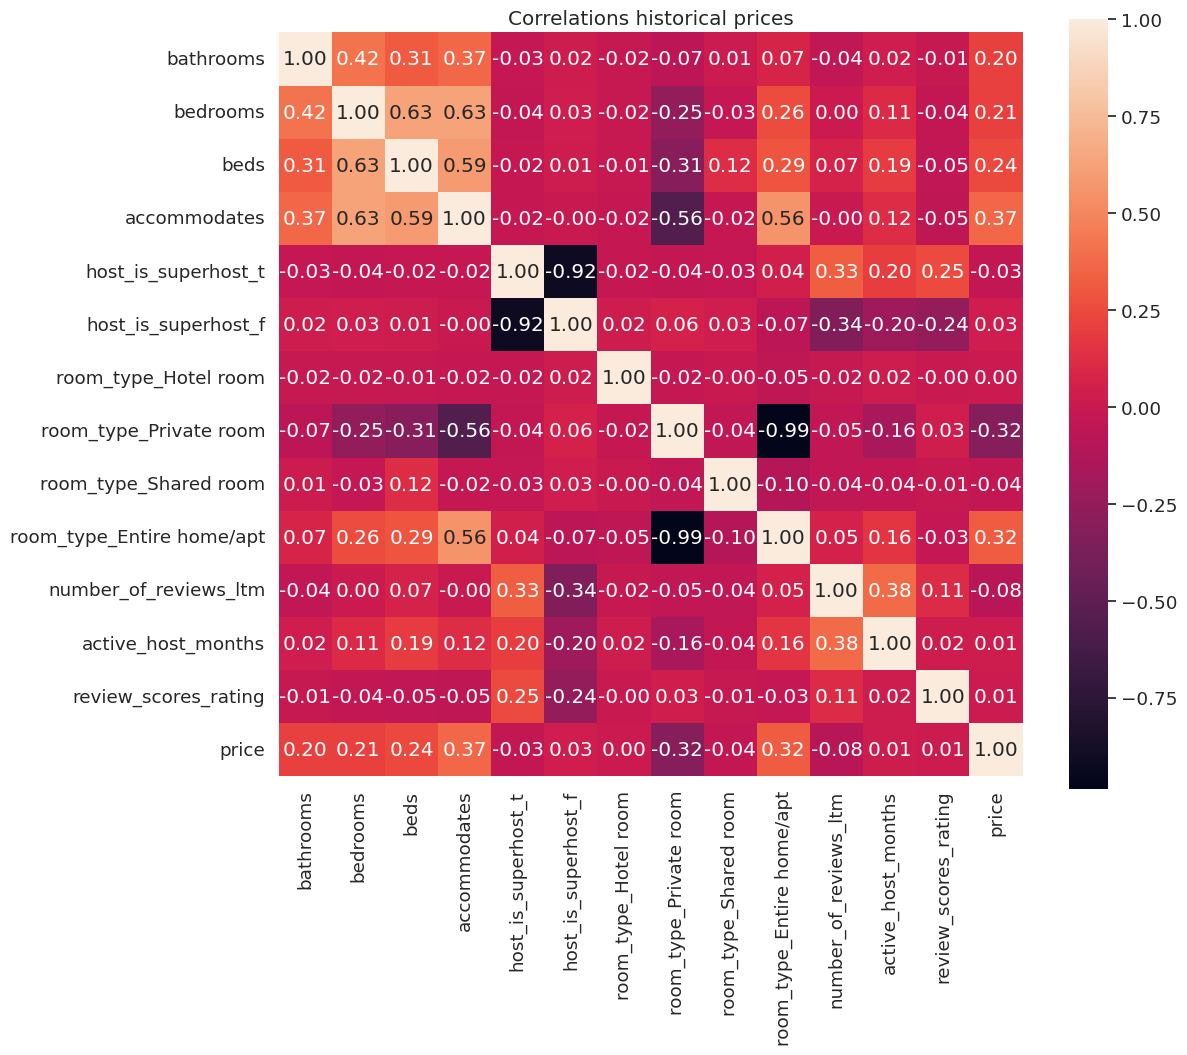

In [224]:
cols = ['bathrooms','bedrooms','beds', 'accommodates', 'host_is_superhost_t', 
        'host_is_superhost_f', 
        'room_type_Hotel room',	'room_type_Private room', 
        'room_type_Shared room', 'room_type_Entire home/apt', 
        'number_of_reviews_ltm', 'active_host_months', 
        'review_scores_rating', 'price']

corrs = np.corrcoef(df_current[cols].values.T)
# Set the size of the plot
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Set font scale for better readability
sns.set(font_scale=1.2)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations historical prices')


fig = hm.get_figure()
fig.savefig('correlations.png')

In [225]:
# Future Price

In [226]:
df = df_listing[['id', 'host_since', 'first_review', 'last_review',  'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews_ltm', 'review_scores_rating',
                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                 'review_scores_value', 'reviews_per_month', 'host_response_rate', 'host_acceptance_rate',	'host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'instant_bookable']]



In [227]:
type(df_calendar)

pandas.core.frame.DataFrame

In [228]:
df_price = df.merge(df_calendar, left_on='id', right_on='listing_id', how='inner')
df_price.head()

,id,host_since,first_review,last_review,accommodates,bathrooms,bedrooms,beds,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,instant_bookable,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96%,f,LA SAIDIA,Entire rental unit,Entire home/apt,f,48154,2024-06-22,f,75.0,NaN,3.0,25.0,6,2024
1,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96%,f,LA SAIDIA,Entire rental unit,Entire home/apt,f,48154,2024-06-23,f,75.0,NaN,3.0,25.0,6,2024
2,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96%,f,LA SAIDIA,Entire rental unit,Entire home/apt,f,48154,2024-06-24,f,75.0,NaN,5.0,22.0,6,2024
3,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96%,f,LA SAIDIA,Entire rental unit,Entire home/apt,f,48154,2024-06-25,f,75.0,NaN,5.0,22.0,6,2024
4,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96%,f,LA SAIDIA,Entire rental unit,Entire home/apt,f,48154,2024-06-26,f,75.0,NaN,5.0,22.0,6,2024


In [229]:
df_price['bathrooms'] = df_price['bathrooms'].fillna(df_price['bathrooms'].mode()[0])
df_price['bedrooms'] = df_price['bedrooms'].fillna(df_price['bedrooms'].mode()[0])
df_price['beds'] = df_price['beds'].fillna(df_price['beds'].mode()[0])

df_price['first_review'] = pd.to_datetime(df_price['first_review'])
df_price['last_review'] = pd.to_datetime(df_price['last_review'])

# Calculate the difference in months
df_price['active_host_months'] = ((df_price['last_review'].dt.year - df_price['first_review'].dt.year) * 12 +
                                (df_price['last_review'].dt.month - df_price['first_review'].dt.month)).fillna(0).astype(int)

df_price['review_scores_rating'] = df_price['review_scores_rating'].fillna(df_price['review_scores_rating'].median())
df_price['host_acceptance_rate'] =  df_price['host_acceptance_rate'].str.replace(',', '').str.replace('%', '').astype(float)

#Drop columns with all NaN values
df_price = df_price.dropna(how='all', axis=1)

cat_cols = ['room_type', 'host_is_superhost']

#dummy all the cat_cols
for col in  cat_cols:
    df_price = pd.concat([df_price.drop(col, axis=1), pd.get_dummies(df_price[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=False).astype(int)], axis=1)


In [230]:
df_price.head()

,id,host_since,first_review,last_review,accommodates,bathrooms,bedrooms,beds,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,instant_bookable,listing_id,date,available,price,minimum_nights,maximum_nights,month,year,active_host_months,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t
0,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96.0,LA SAIDIA,Entire rental unit,f,48154,2024-06-22,f,75.0,3.0,25.0,6,2024,164,1,0,0,0,1,0
1,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96.0,LA SAIDIA,Entire rental unit,f,48154,2024-06-23,f,75.0,3.0,25.0,6,2024,164,1,0,0,0,1,0
2,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96.0,LA SAIDIA,Entire rental unit,f,48154,2024-06-24,f,75.0,5.0,22.0,6,2024,164,1,0,0,0,1,0
3,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96.0,LA SAIDIA,Entire rental unit,f,48154,2024-06-25,f,75.0,5.0,22.0,6,2024,164,1,0,0,0,1,0
4,48154,2010-09-01,2010-10-12,2024-06-12,4,1.0,2.0,2.0,31,4.6,4.69,4.62,4.84,4.78,4.49,4.52,0.97,100%,96.0,LA SAIDIA,Entire rental unit,f,48154,2024-06-26,f,75.0,5.0,22.0,6,2024,164,1,0,0,0,1,0


In [231]:
df_price.columns

Index(['id', 'host_since', 'first_review', 'last_review', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'host_response_rate',
       'host_acceptance_rate', 'neighbourhood_group_cleansed', 'property_type',
       'instant_bookable', 'listing_id', 'date', 'available', 'price',
       'minimum_nights', 'maximum_nights', 'month', 'year',
       'active_host_months', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_f', 'host_is_superhost_t'],
      dtype='object')

In [232]:
numeric_cols = df_price.select_dtypes(include=['number']).columns

# Group by 'id' and calculate the mean for numeric columns
df_price_grouped = df_price.groupby('id')[numeric_cols].mean()


### Correlation Matrix Future Prices

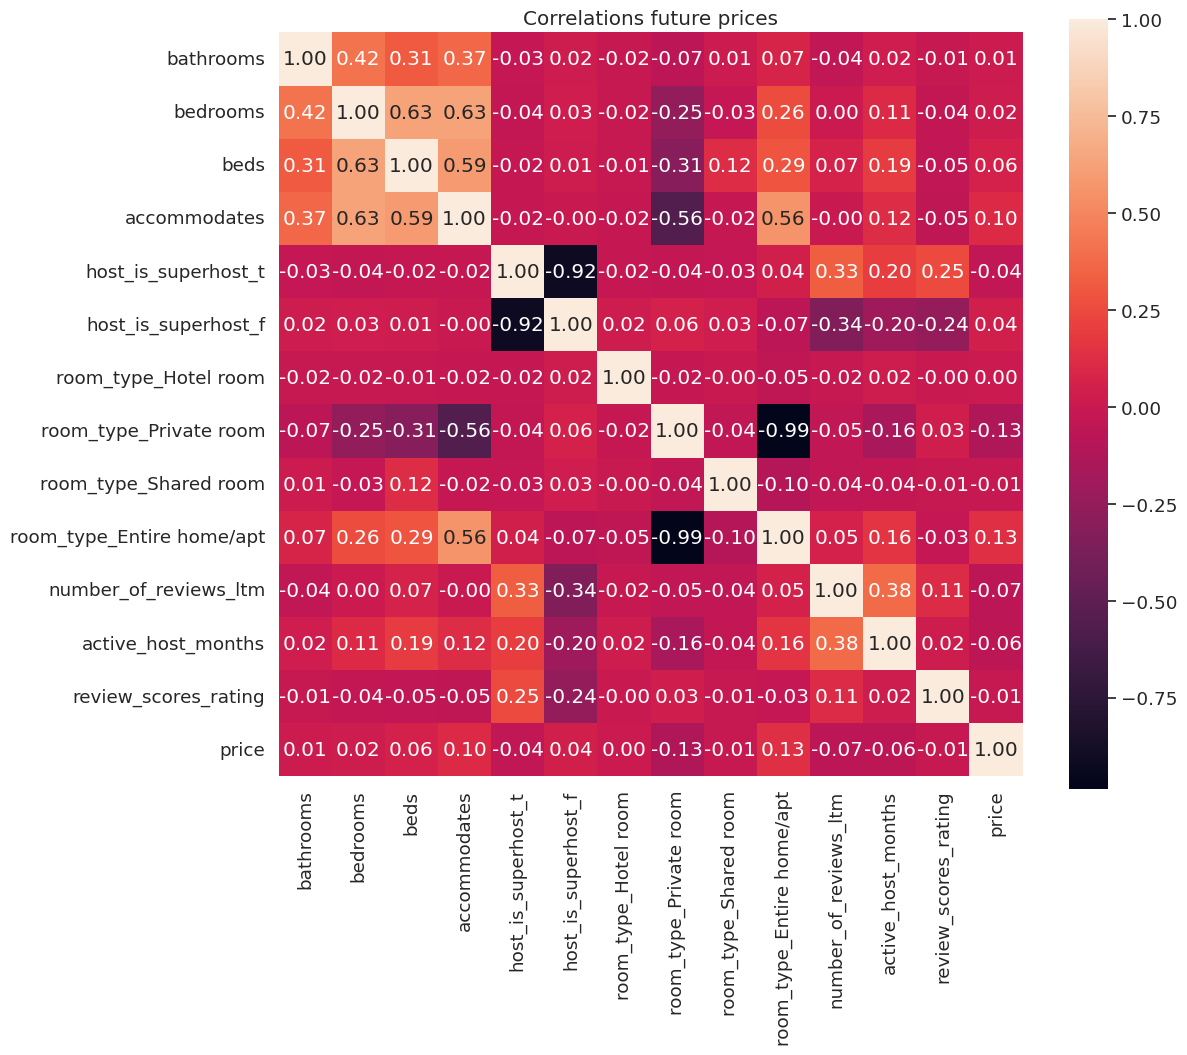

In [233]:
cols = ['bathrooms','bedrooms','beds',  'accommodates', 'host_is_superhost_t', 
        'host_is_superhost_f', 
        'room_type_Hotel room',	'room_type_Private room', 
        'room_type_Shared room', 'room_type_Entire home/apt', 
        'number_of_reviews_ltm', 'active_host_months', 
        'review_scores_rating', 'price']

corrs = np.corrcoef(df_price_grouped[cols].values.T)
# Set the size of the plot
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Set font scale for better readability
sns.set(font_scale=1.2)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations future prices')

fig = hm.get_figure()
fig.savefig('correlations.png')

## Review WordCloud

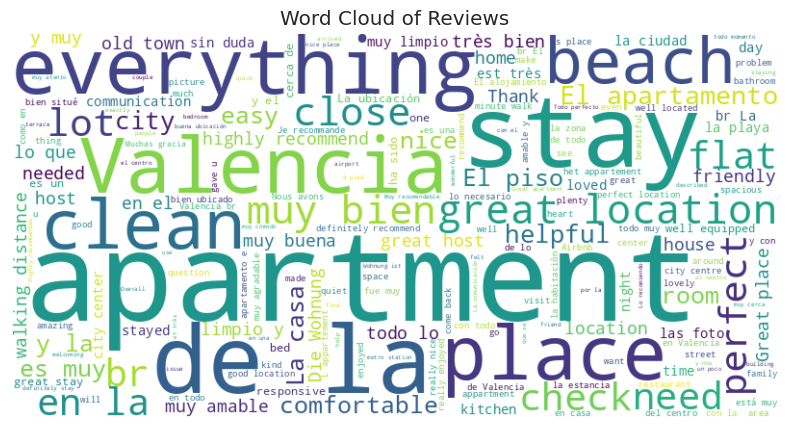

In [234]:
# Step 1: Convert the comments column to a single string
comments_text = " ".join(df_review['comments'].astype(str))

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Step 3: Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Reviews')
plt.show()

## Evolution of listings

In [235]:
df_review_listings = df_review.groupby('year')['listing_id'].nunique().reset_index()
df_review_listings

,year,listing_id
0,2010,1
1,2011,6
2,2012,27
3,2013,94
4,2014,168
5,2015,297
6,2016,576
7,2017,965
8,2018,1465
9,2019,1861


## Evolution of reviews

In [236]:
df_review_reviewers = df_review.groupby('year')['reviewer_id'].nunique().reset_index()
df_review_reviewers

,year,reviewer_id
0,2010,2
1,2011,28
2,2012,188
3,2013,859
4,2014,2072
5,2015,4930
6,2016,10444
7,2017,18765
8,2018,31727
9,2019,42890


In [237]:
df_combined = pd.merge(df_review_reviewers, df_review_listings, on='year')

# Set the index to 'year' for better visualization
df_melted = df_combined.melt(id_vars='year', value_vars=['reviewer_id', 'listing_id'], 
                              var_name='count_unique', value_name='count')

# Pivot the DataFrame to wide format
df_pivot = df_melted.pivot(index='count_unique', columns='year', values='count')
df_pivot

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count_unique,,,,,,,,,,,,,,,
listing_id,1,6,27,94,168,297,576,965,1465,1861,1767,2381,3597,5666,6356
reviewer_id,2,28,188,859,2072,4930,10444,18765,31727,42890,14751,32124,68204,103925,64573


## Distribution per Neighborhoods

In [238]:
df_neighbourhood_distribution = pd.DataFrame(df_listing.groupby('neighbourhood_group_cleansed').agg(
    unique_id_count=('id', 'nunique'),
    mean_price=('price', 'mean')
).sort_values(by='unique_id_count', ascending=False).reset_index())
df_neighbourhood_distribution

,neighbourhood_group_cleansed,unique_id_count,mean_price
0,POBLATS MARITIMS,1771,139.874647
1,CIUTAT VELLA,1471,139.108090
2,CAMINS AL GRAU,847,111.129870
3,QUATRE CARRERES,754,100.948276
4,L'EIXAMPLE,744,148.361559
5,EXTRAMURS,667,110.524738
6,LA SAIDIA,536,143.384328
7,ALGIROS,420,113.921429
8,L'OLIVERETA,284,82.584507
9,JESUS,279,90.820789


### Barchart for Current Prices

/tmp/ipykernel_151199/1648410608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='unique_id_count', y='neighbourhood_group_cleansed', data=df_neighbourhood_distribution, palette='viridis')


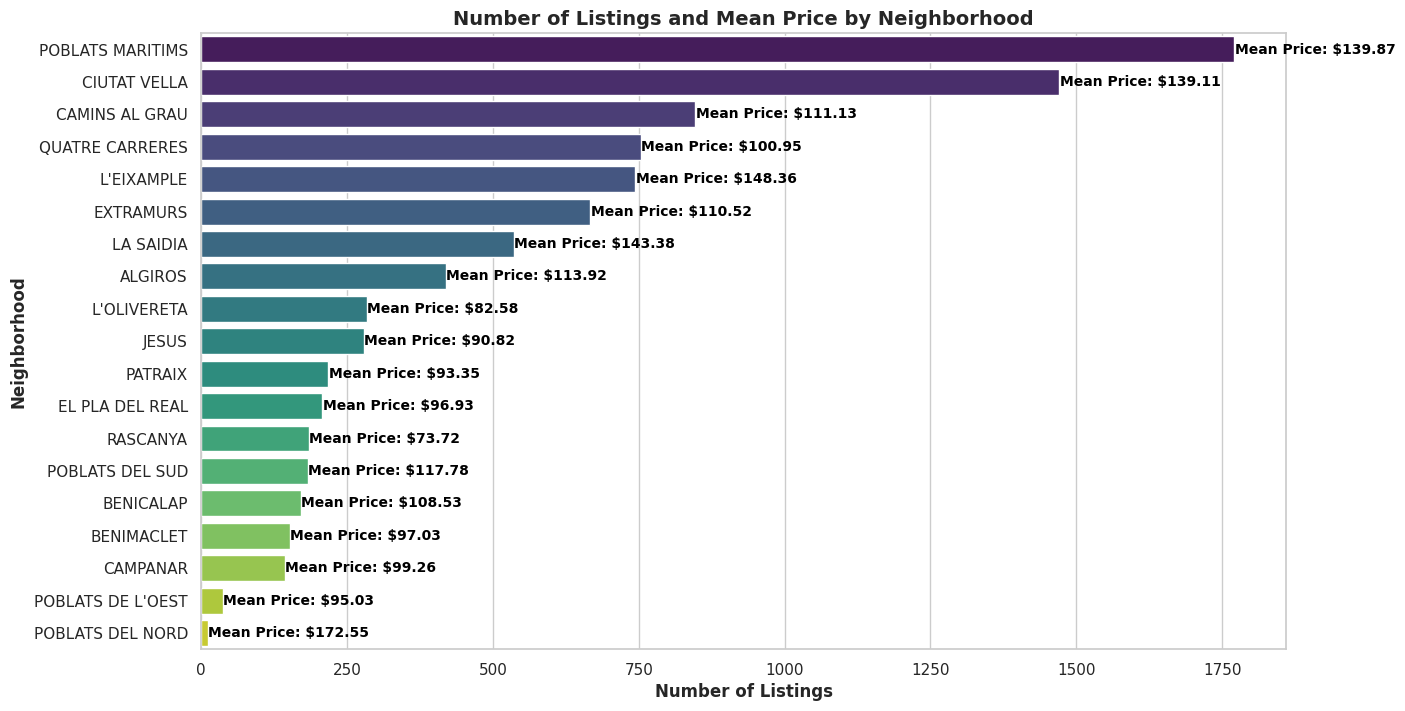

In [239]:
sns.set(style="whitegrid");
plt.figure(figsize=(14, 8));
barplot = sns.barplot(x='unique_id_count', y='neighbourhood_group_cleansed', data=df_neighbourhood_distribution, palette='viridis')

# Add text annotations for the mean_price alongside each bar
for index, row in df_neighbourhood_distribution.iterrows():
    plt.text(
        row['unique_id_count'] + 0.5,  # Position slightly offset to the right of the bar
        index,  # Align with the y-axis index of each bar
        f"Mean Price: ${row['mean_price']:.2f}",  # Display mean price with a dollar sign and 2 decimal places
        color='black', ha="left", va="center", fontsize=10, fontweight='bold'
    )

# Set axis labels with enhanced formatting
plt.xlabel('Number of Listings', fontsize=12, fontweight='bold')
plt.ylabel('Neighborhood', fontsize=12, fontweight='bold')

# Set title for better context
plt.title('Number of Listings and Mean Price by Neighborhood', fontsize=14, fontweight='bold')

# Show plot
plt.show()

In [240]:
df_price.columns

Index(['id', 'host_since', 'first_review', 'last_review', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'host_response_rate',
       'host_acceptance_rate', 'neighbourhood_group_cleansed', 'property_type',
       'instant_bookable', 'listing_id', 'date', 'available', 'price',
       'minimum_nights', 'maximum_nights', 'month', 'year',
       'active_host_months', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_f', 'host_is_superhost_t'],
      dtype='object')

In [241]:

df_price_grouped = df_price.groupby('neighbourhood_group_cleansed').agg(
    unique_id_count=('id', 'nunique'),
    mean_price=('price', 'mean')
).sort_values(by='unique_id_count', ascending=False).reset_index()
df_price_grouped

,neighbourhood_group_cleansed,unique_id_count,mean_price
0,POBLATS MARITIMS,1771,136.126565
1,CIUTAT VELLA,1471,166.138924
2,CAMINS AL GRAU,847,134.135773
3,QUATRE CARRERES,754,173.201517
4,L'EIXAMPLE,744,152.566658
5,EXTRAMURS,667,233.771144
6,LA SAIDIA,536,231.611960
7,ALGIROS,420,97.714286
8,L'OLIVERETA,284,85.911481
9,JESUS,279,100.164186


### Barchart for Future Prices

/tmp/ipykernel_151199/1849111624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='unique_id_count', y='neighbourhood_group_cleansed', data=df_price_grouped, palette='viridis')


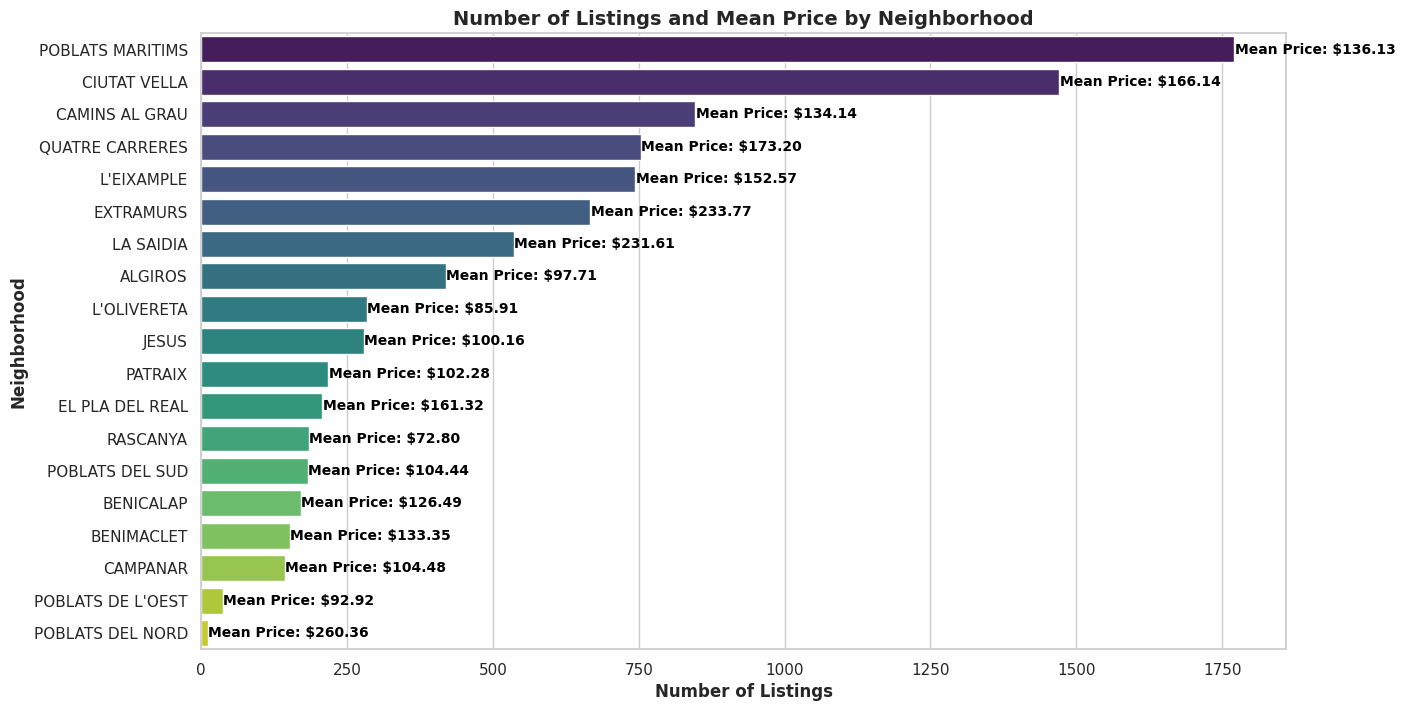

In [242]:
sns.set(style="whitegrid");
plt.figure(figsize=(14, 8));
barplot = sns.barplot(x='unique_id_count', y='neighbourhood_group_cleansed', data=df_price_grouped, palette='viridis')

# Add text annotations for the mean_price alongside each bar
for index, row in df_price_grouped.iterrows():
    plt.text(
        row['unique_id_count'] + 0.5,  # Position slightly offset to the right of the bar
        index,  # Align with the y-axis index of each bar
        f"Mean Price: ${row['mean_price']:.2f}",  # Display mean price with a dollar sign and 2 decimal places
        color='black', ha="left", va="center", fontsize=10, fontweight='bold'
    )

# Set axis labels with enhanced formatting
plt.xlabel('Number of Listings', fontsize=12, fontweight='bold')
plt.ylabel('Neighborhood', fontsize=12, fontweight='bold')

# Set title for better context
plt.title('Number of Listings and Mean Price by Neighborhood', fontsize=14, fontweight='bold')

# Show plot
plt.show()

## Distribution per Room Type

In [246]:

df_room_type = pd.DataFrame(
    df_listing.groupby('room_type').agg(
    listing_count=('id', 'nunique'),
    mean_price=('price', 'mean')
).sort_values(by='listing_count', ascending=False).reset_index())

total_count = df_room_type['listing_count'].sum()

# Calculate the percentage
df_room_type['percentage_listing'] = round((df_room_type['listing_count'] / total_count) * 100, 2)
df_room_type['percentage_listing'] = df_room_type['percentage_listing'].astype(str) + ' %'
df_room_type['mean_price'] = round(df_room_type['mean_price'], 2).astype(str) + ' $'
df_room_type = df_room_type[['room_type', 'listing_count', 'percentage_listing', 'mean_price']]



In [247]:
merged_df = pd.merge(df_listing, df_review, left_on='id', right_on='listing_id', how='inner') 

print(f"Listing rows: {df_listing.shape[0]}, Review rows: {df_review.shape[0]}, Merged rows: {merged_df.shape[0]}")

Listing rows: 9082, Review rows: 409547, Merged rows: 395810


In [250]:
df_room_type_number_reviews = merged_df.groupby(['room_type']).agg(
    cum_number_of_reviews=('id_y', 'size')
).reset_index()

total_count = df_room_type_number_reviews['cum_number_of_reviews'].sum()

df_room_type_number_reviews['percentage_reviews'] = round((df_room_type_number_reviews['cum_number_of_reviews'] / total_count) * 100, 2)
df_room_type_number_reviews['percentage_reviews'] = df_room_type_number_reviews['percentage_reviews'].astype(str) + ' %'

In [251]:
df_room_type = pd.merge(df_room_type, df_room_type_number_reviews, on='room_type', how='inner')
# Swap axes (transpose the DataFrame)
df_room_type.T

,0,1,2,3
room_type,Entire home/apt,Private room,Shared room,Hotel room
listing_count,6445,2589,37,11
percentage_listing,70.96 %,28.51 %,0.41 %,0.12 %
mean_price,148.83 $,56.68 $,43.7 $,122.55 $
cum_number_of_reviews,316746,78456,195,413
percentage_reviews,80.02 %,19.82 %,0.05 %,0.1 %


## Evolution of the Average price overtime by Neighborhoods

In [ ]:
# Calculate the average price per night for each month
average_price_per_month = df_calendar.groupby(['year', 'month'])['price'].mean()

In [ ]:
average_price_per_month

year  month
2024  6        150.372723
      7        150.118070
      8        150.118070
      9        150.118070
      10       150.118070
      11       150.118070
      12       150.118070
2025  1        150.118070
      2        150.118070
      3        150.118070
      4        150.118070
      5        150.118070
      6        149.935022
Name: price, dtype: float64

In [ ]:
average_price_per_month = merged_df.groupby(['year', 'month'])['price'].mean()

In [ ]:
average_price_per_month

year  month
2010  10        92.000000
      11        92.000000
2011  3         92.000000
      4         92.000000
      6         92.000000
      7        200.500000
      8        132.000000
      9        102.000000
      10       107.800000
      11        89.142857
      12       112.250000
2012  1        111.000000
      2        111.000000
      3        124.500000
      4        106.000000
      5        125.583333
      6        147.263158
      7        120.761905
      8        120.321429
      9        128.629630
      10       125.181818
      11       135.200000
      12       129.150000
2013  1        137.608696
      2        125.440000
      3        130.086207
      4        114.677419
      5        120.480000
      6        124.597403
      7        132.528090
      8        118.500000
      9        117.095238
      10       121.193878
      11       118.915663
      12       117.843137
2014  1        123.276923
      2        120.846154
      3        111.512195


In [ ]:
# Create a total fictitious neighborhood by summing up all values for each year
total_neighborhood = merged_df.groupby('year').agg(
    number_of_reviews=('id_y', 'size'),  # Counting the number of records
    mean_price=('price', 'mean')
).reset_index()

total_neighborhood['neighbourhood_group_cleansed'] = 'Valencia'

# Concatenate the total neighborhood DataFrame with the original DataFrame grouped by year and neighborhood
grouped_df = merged_df.groupby(['year', 'neighbourhood_group_cleansed']).agg(
    number_of_reviews=('id_y', 'size'),
    mean_price=('price', 'mean')
).reset_index()

# Concatenate the total neighborhood DataFrame to the grouped DataFrame
df = pd.concat([grouped_df, total_neighborhood], ignore_index=True)

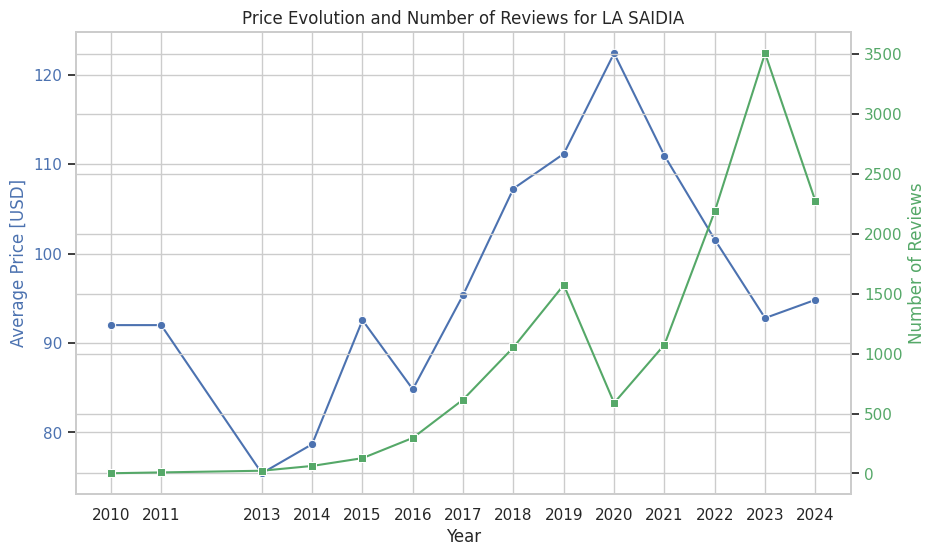

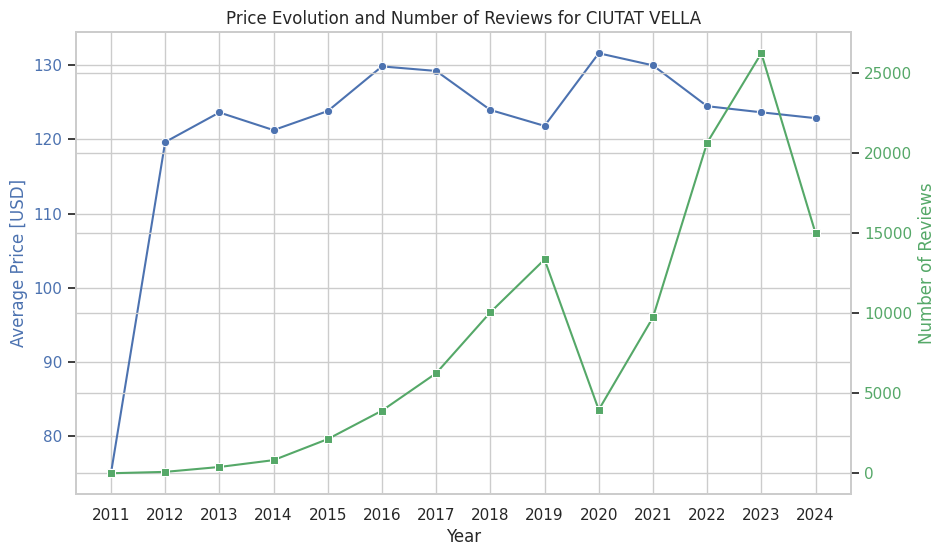

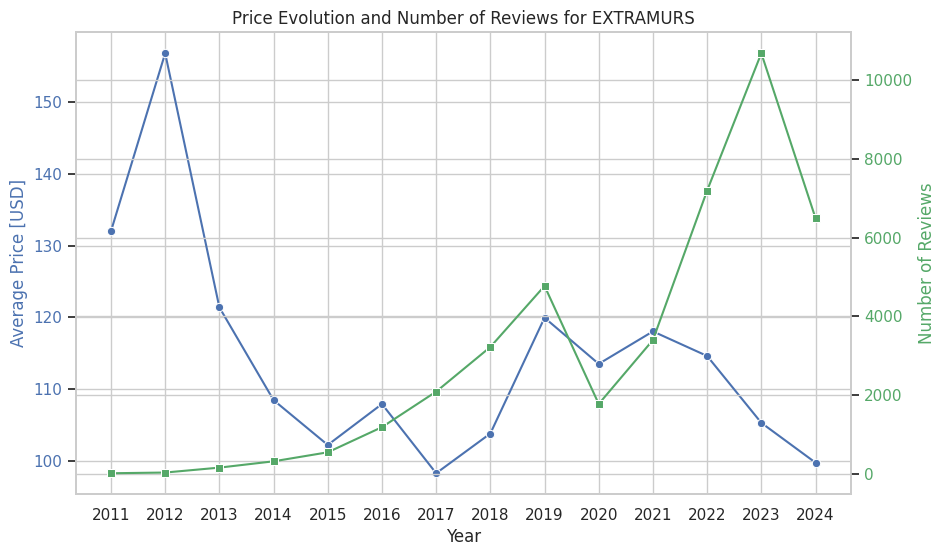

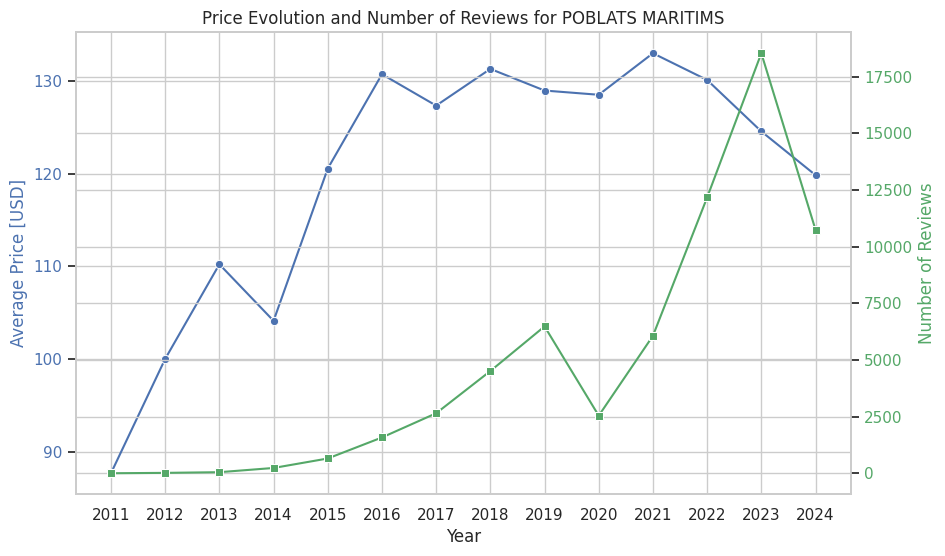

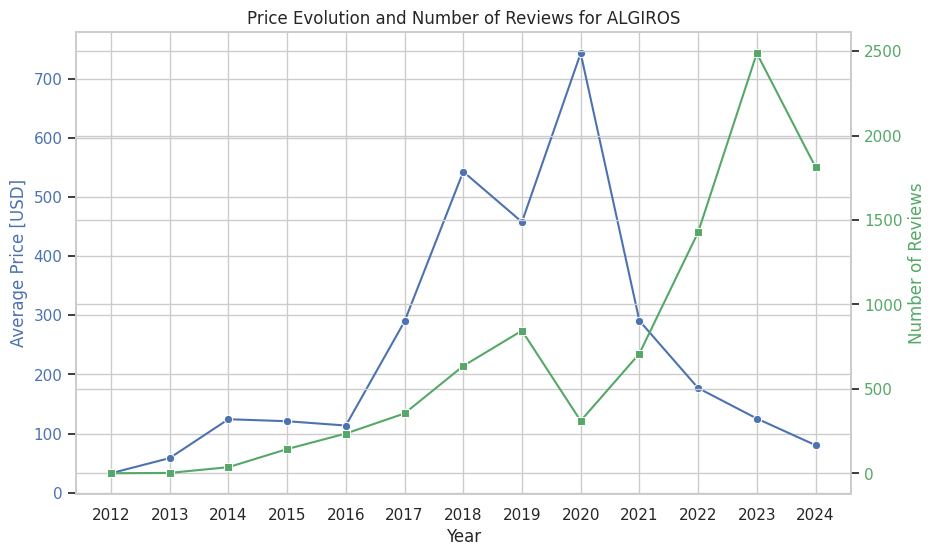

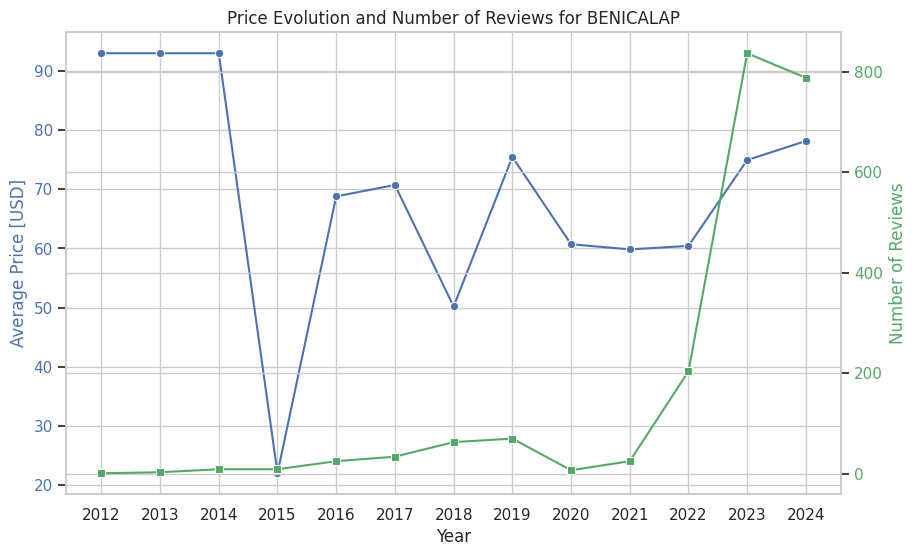

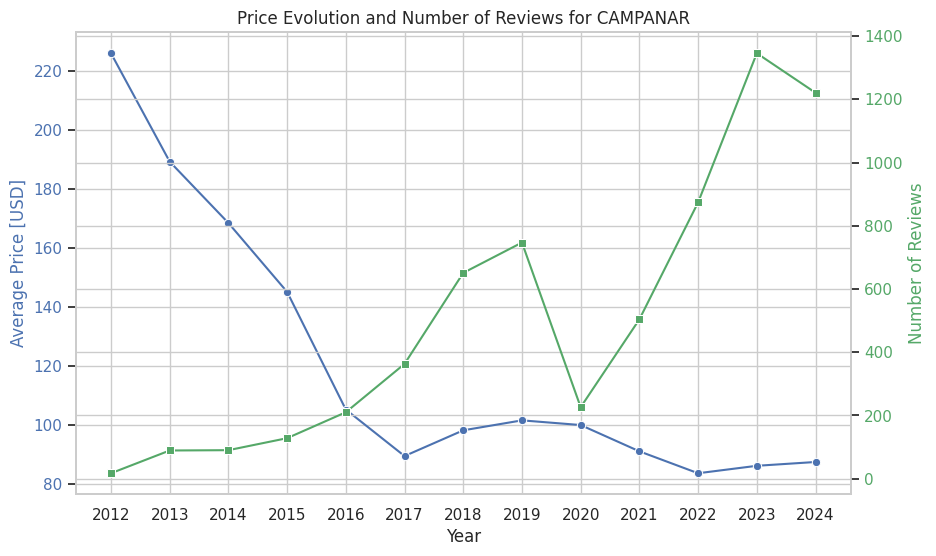

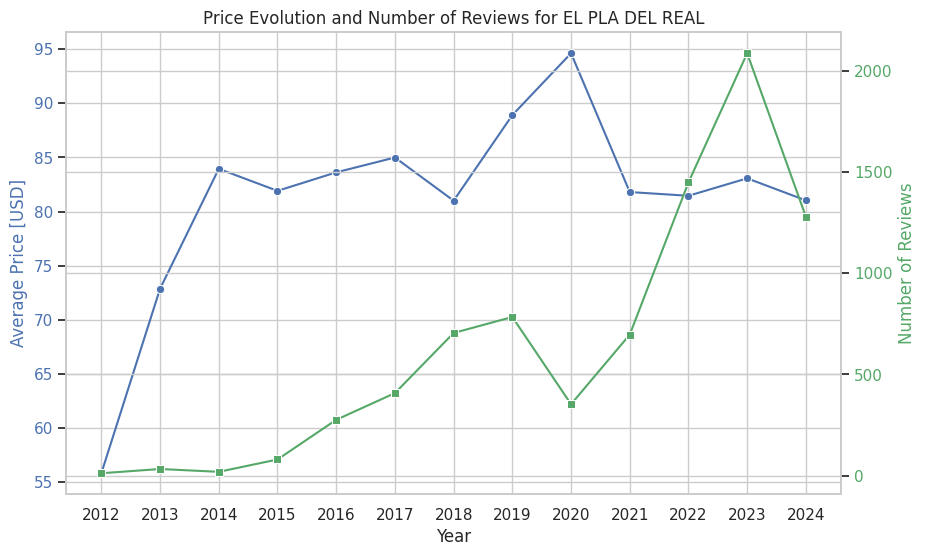

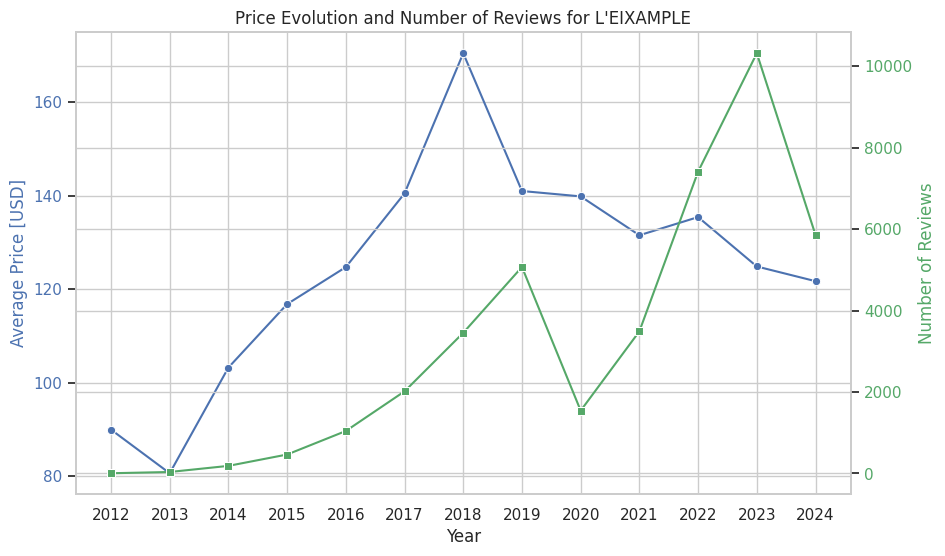

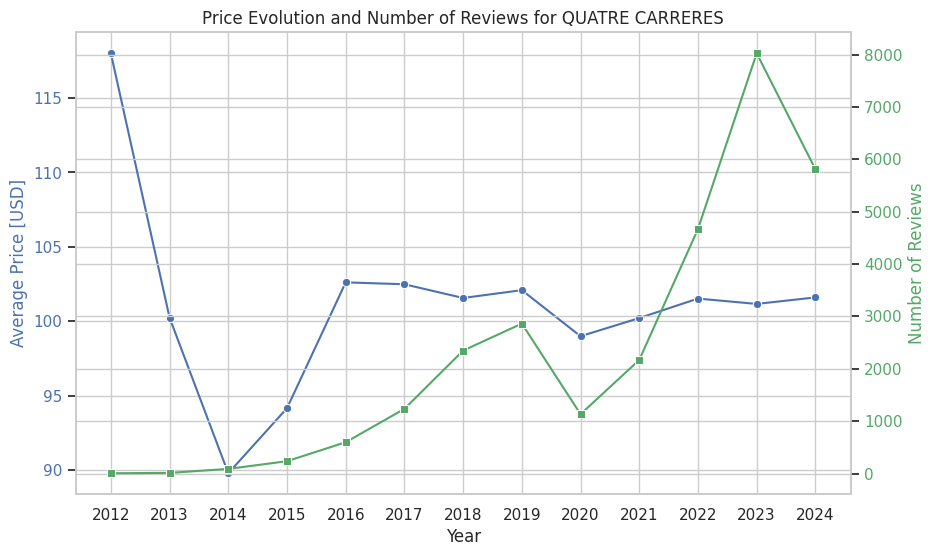

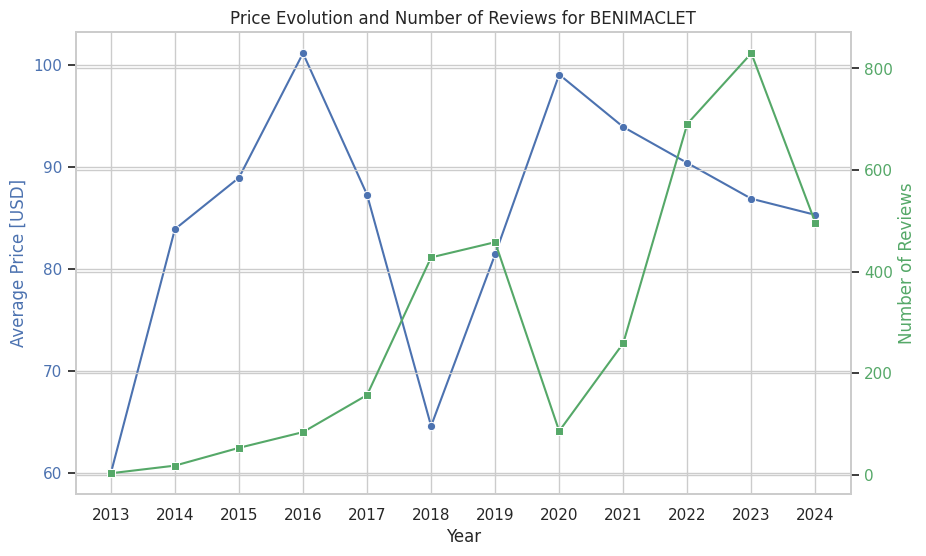

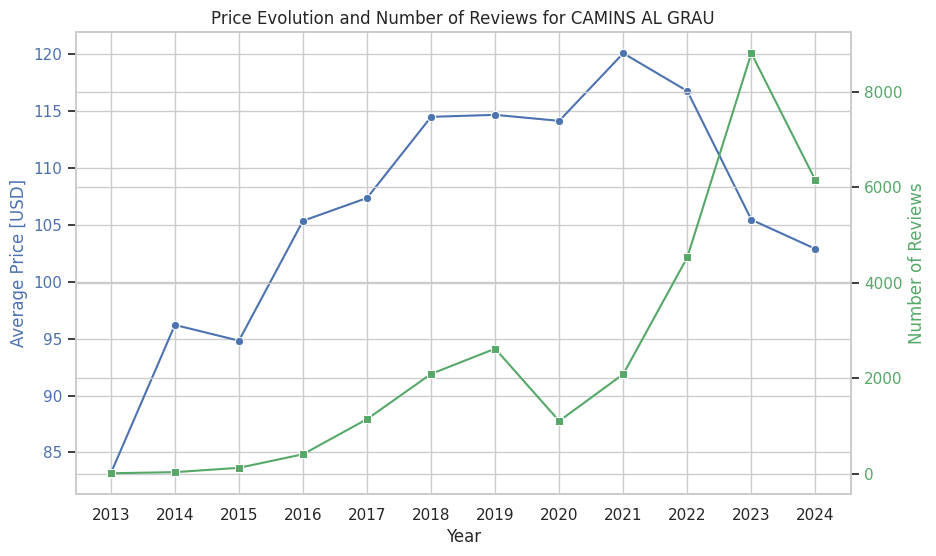

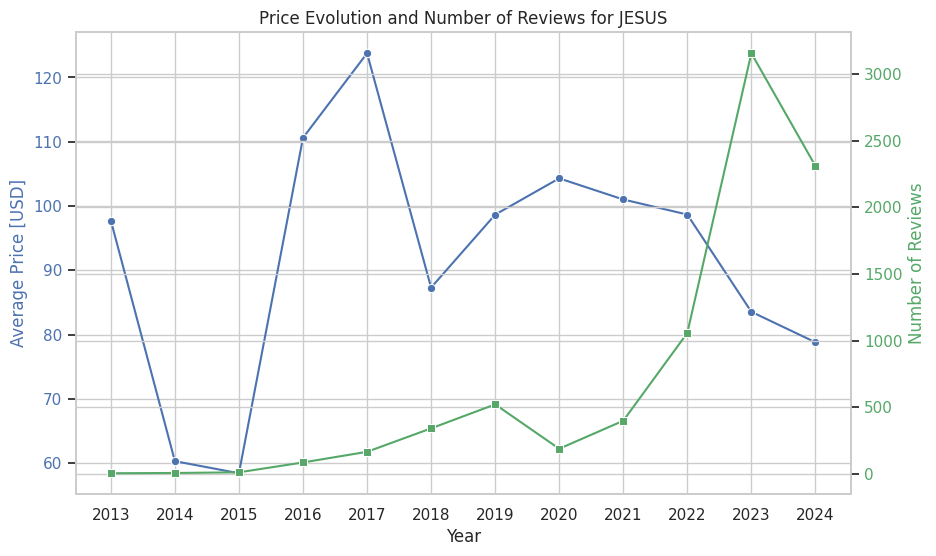

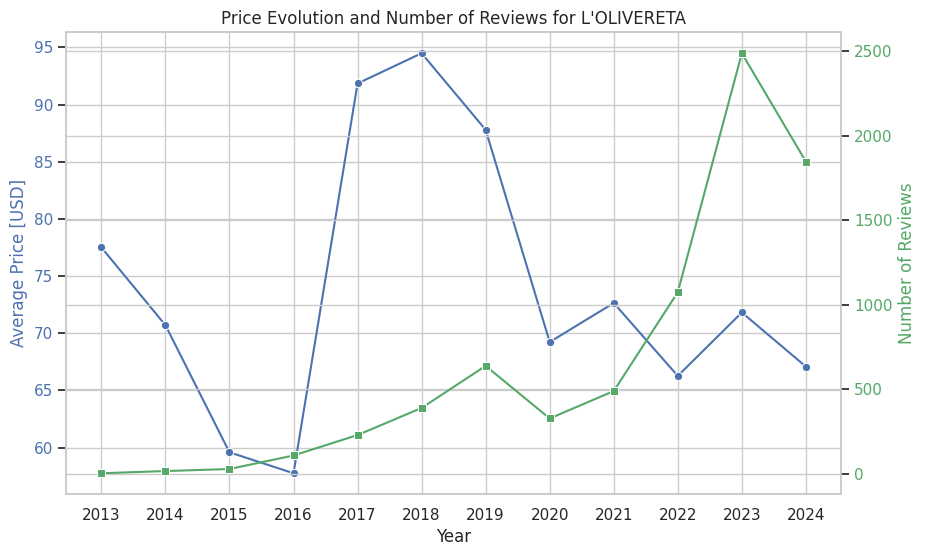

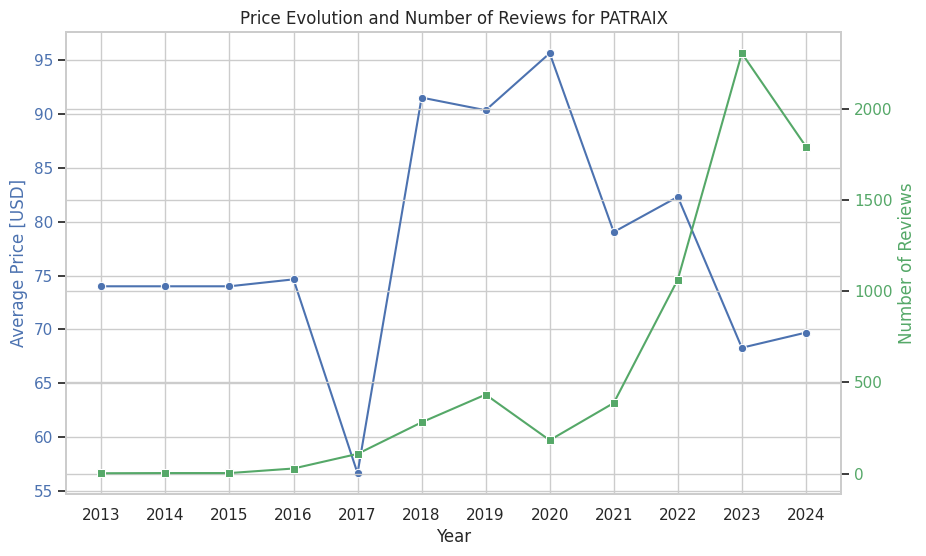

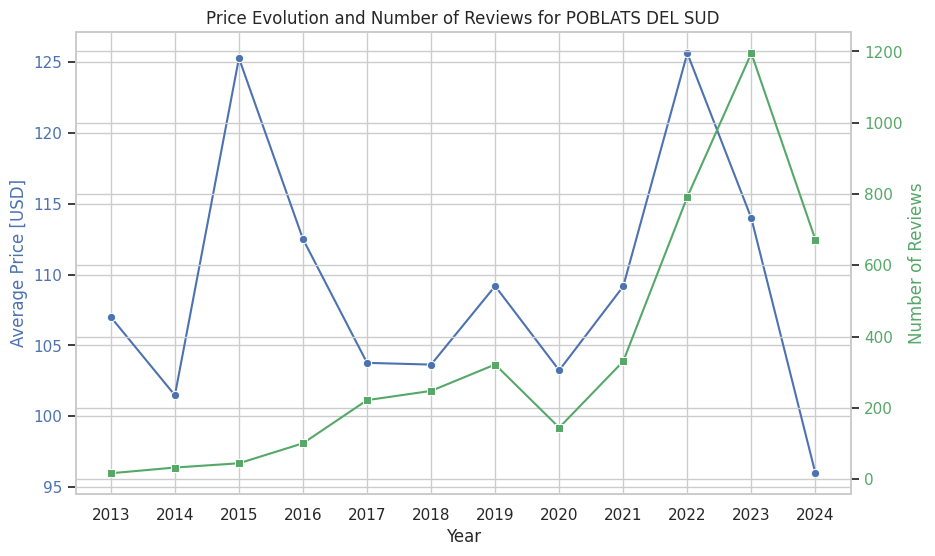

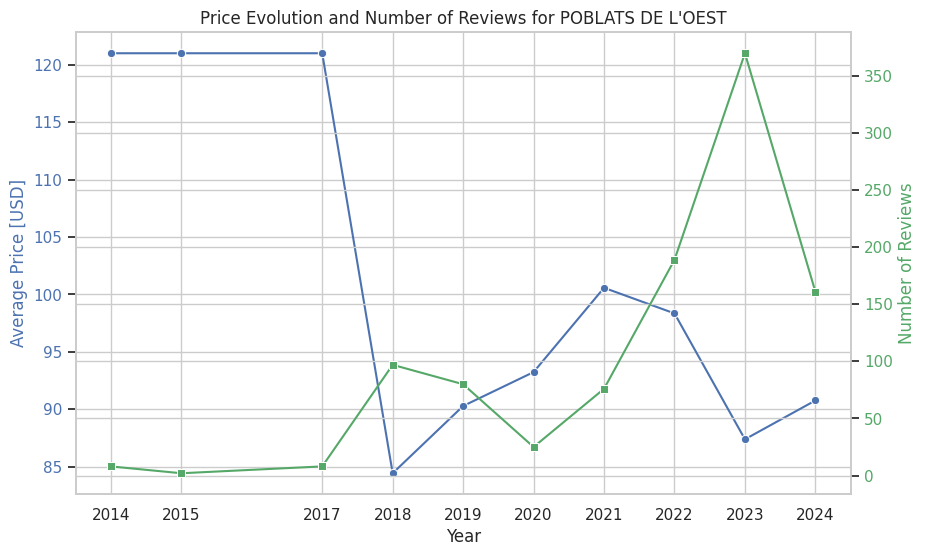

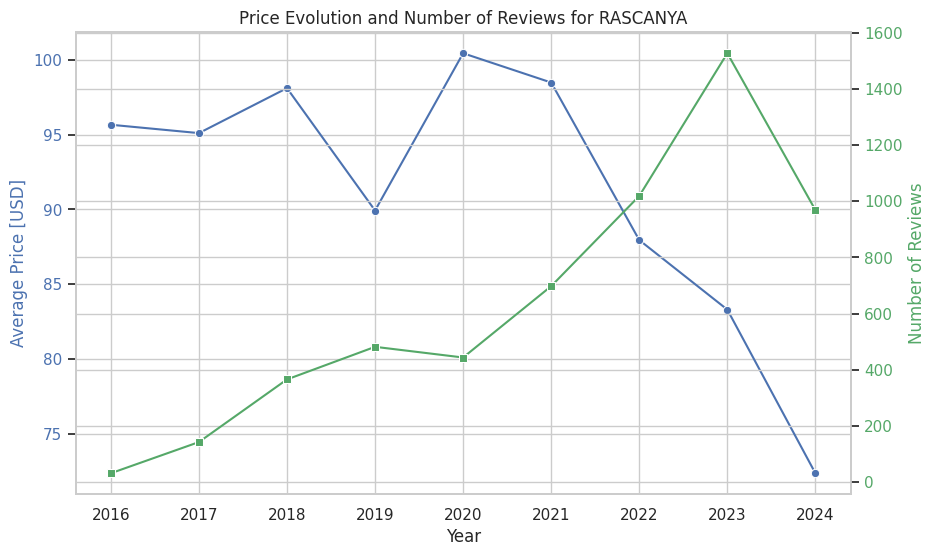

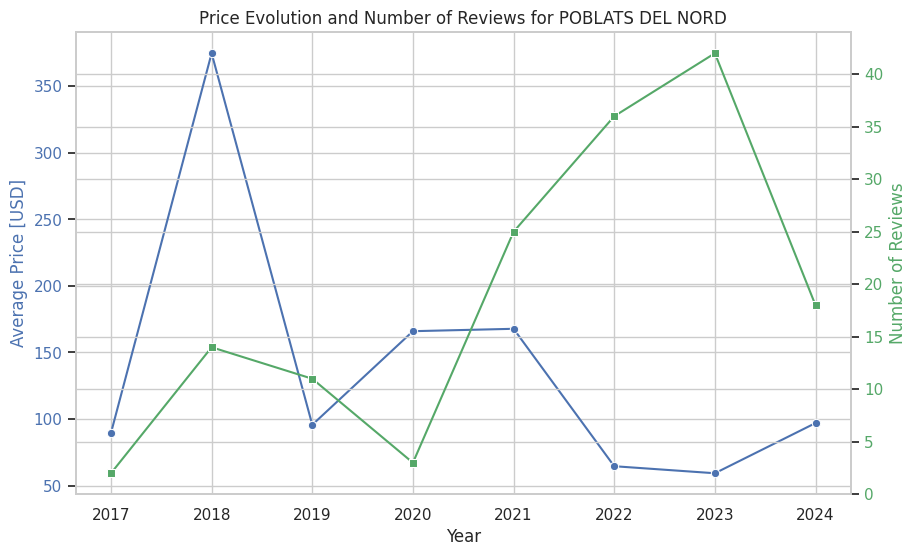

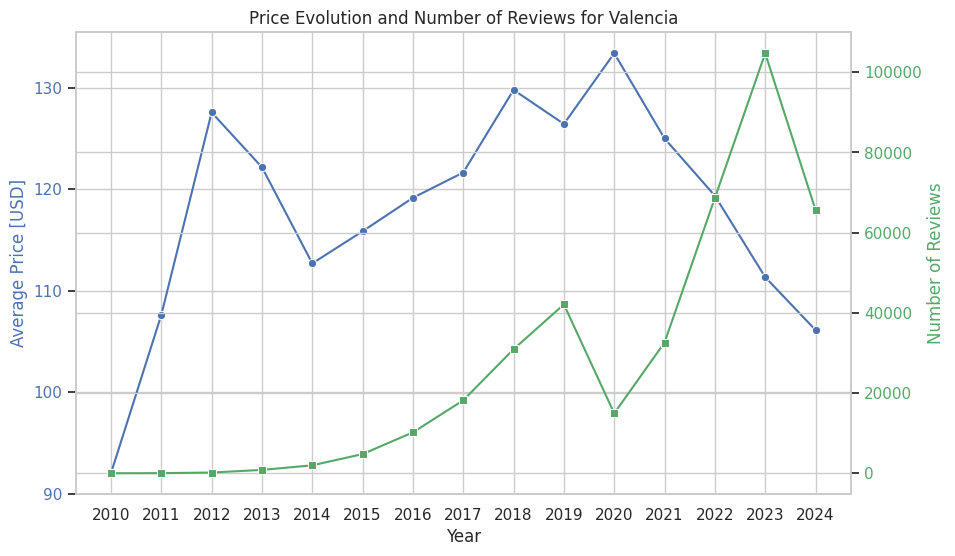

In [ ]:
for neighborhood in df['neighbourhood_group_cleansed'].unique():
    # Filter the DataFrame for the current neighborhood
    df_neighborhood = df[df['neighbourhood_group_cleansed'] == neighborhood]

    # Set up the plot for the current neighborhood
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot average_price on the left y-axis
    sns.lineplot(data=df_neighborhood, x='year', y='mean_price', marker='o', color='b', ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Price [USD]', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a secondary y-axis for number_of_reviews
    ax2 = ax1.twinx()
    sns.lineplot(data=df_neighborhood, x='year', y='number_of_reviews', marker='s', color='g', ax=ax2)
    ax2.set_ylabel('Number of Reviews', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Customize the plot
    plt.title(f'Price Evolution and Number of Reviews for {neighborhood}')
    ax1.set_xticks(df_neighborhood['year'])
    plt.xticks(rotation=45)
    ax1.grid(visible=True)

    # Show the plot
    plt.show()